<a href="https://colab.research.google.com/github/DataAnalysis-python/soccer-FIFA/blob/main/%EC%9D%B4%EC%A0%81%EB%A3%8C_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<div style="text-align: right"> <b>201984044 ICT공학부 김희성</b></div>
<div style="text-align: right"> <b>201904073 소프트웨어전공 윤선미</b></div>


In [ ]:
import pandas as pd
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv]
#!rm ~/.cache/matplotlib -rf

#plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train= pd.read_csv('/content/drive/MyDrive/데이콘/FIFA_train.csv')

In [ ]:
#train.rename(columns={'age': '나이', 'stat_overall' : '선수의 현재 능력치' ,'stat_potential' : '선수의 발전 가능성', 'value' : '이적료', 
                    #  'continent' : '선수들의 국적', 'contract_until' : '선수의 계약 기간', 'position' : '선수의 포지션',
                    #  'prefer_foot' : '선수의 주 발', 'reputation' : '선수의 유명도', 'stat_skill_moves' : '선수의 개인 능력'}, inplace=True)

In [ ]:
# 컬럼의 고유값 개수를 확인 

for col in train.columns:
  n_unique=len(train[col].unique())
  print(col,n_unique)

id 8932
name 8932
age 25
continent 5
contract_until 17
position 4
prefer_foot 2
reputation 5
stat_overall 46
stat_potential 45
stat_skill_moves 5
value 198


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [ ]:
 # 필요없는 데이터 삭제
 
train.drop(['id','name'],axis=1,inplace=True)

In [ ]:
# 데이터 프레임의 열 간의 상관관계를 시각적으로 표현

train.corr().style.background_gradient(cmap='Blues_r')

<ipython-input-53-2351c1afb92e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr().style.background_gradient(cmap='Blues_r')


,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
age,1.000000,0.263468,0.467345,-0.231303,0.039362,0.087319
reputation,0.263468,1.000000,0.521389,0.399183,0.196582,0.665982
stat_overall,0.467345,0.521389,1.000000,0.665453,0.400164,0.658444
stat_potential,-0.231303,0.399183,0.665453,1.000000,0.332578,0.611907
stat_skill_moves,0.039362,0.196582,0.400164,0.332578,1.000000,0.298500
value,0.087319,0.665982,0.658444,0.611907,0.298500,1.000000


=>reputation과 stat_overall이 상관관계를 가진다. 

In [ ]:
#계약기간 type은 object 

train.contract_until.value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [ ]:
"""계약기간을 유의미한 값으로 변경
계약기간의 기간을 yyyy로 고정, itn64정수값으로 변환"""
def func(string: str) -> int:
    string = str(string)[-4:]
    return int(string)

train['contract_until'] = train['contract_until'].apply(func)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   int64  
 1   continent         8932 non-null   object 
 2   contract_until    8932 non-null   int64  
 3   position          8932 non-null   object 
 4   prefer_foot       8932 non-null   object 
 5   reputation        8932 non-null   float64
 6   stat_overall      8932 non-null   int64  
 7   stat_potential    8932 non-null   int64  
 8   stat_skill_moves  8932 non-null   float64
 9   value             8932 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 697.9+ KB


In [ ]:
train['continent']=train['continent'].astype('category').cat.codes
train['position'] = train['position'].astype('category').cat.codes
train['prefer_foot'] = train['prefer_foot'].astype('category').cat.codes

In [ ]:
#학습을 위해 데이터 세트를 학습/ 테스트 데이터로 분할

from sklearn.model_selection import train_test_split

X = train.drop(['value'],axis=1)
y = train['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

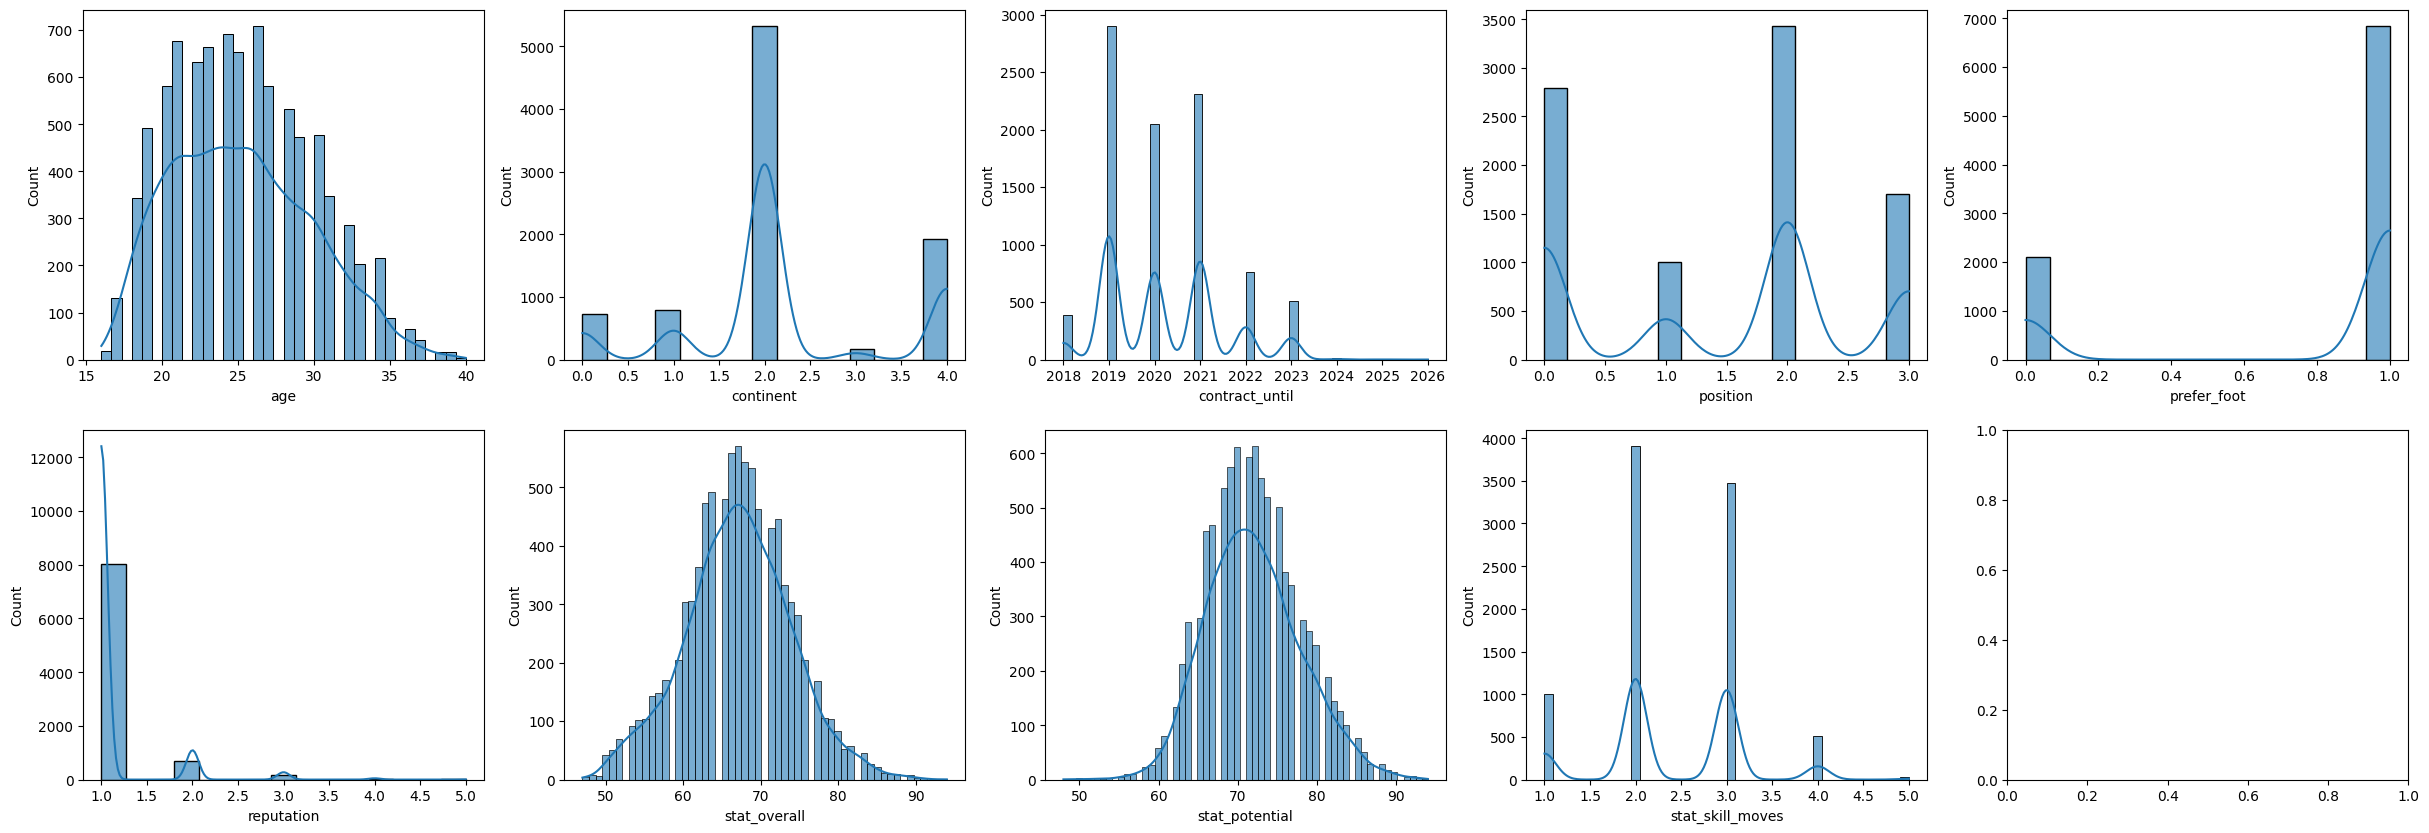

In [ ]:
# 데이터 세트 시각화

# 오류 폰트 삭제

f, axes = plt.subplots(2,5, figsize=(30,10)) 
axes = axes.flatten()
for col,ax in zip(X.columns, axes):
    sns.histplot(data = X, x=col, ax=ax, alpha=0.6, kde=True)
plt.show()

In [ ]:
X.corr().style.background_gradient(cmap='Blues')

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
age,1.000000,0.091028,-0.132052,-0.079128,0.007760,0.263468,0.467345,-0.231303,0.039362
continent,0.091028,1.000000,0.040910,-0.020053,-0.019312,0.012608,0.099486,0.072312,0.012365
contract_until,-0.132052,0.040910,1.000000,0.020076,-0.004760,0.070446,0.156983,0.258477,0.082641
position,-0.079128,-0.020053,0.020076,1.000000,0.105502,0.031215,0.015825,0.069233,0.384022
prefer_foot,0.007760,-0.019312,-0.004760,0.105502,1.000000,0.003859,-0.036585,-0.029030,-0.109107
reputation,0.263468,0.012608,0.070446,0.031215,0.003859,1.000000,0.521389,0.399183,0.196582
stat_overall,0.467345,0.099486,0.156983,0.015825,-0.036585,0.521389,1.000000,0.665453,0.400164
stat_potential,-0.231303,0.072312,0.258477,0.069233,-0.029030,0.399183,0.665453,1.000000,0.332578
stat_skill_moves,0.039362,0.012365,0.082641,0.384022,-0.109107,0.196582,0.400164,0.332578,1.000000


In [ ]:
#학습데이터 

train.columns

Index(['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves',
       'value'],
      dtype='object')

In [ ]:
# reputation열의 값 배열을 2차원으로 열백터로 재배열

X = train['reputation'].values
X = X.reshape(-1,1)
X.shape

(8932, 1)

In [ ]:
# value 배열값을 2차원으로 재배열

y = train['value'].values
y = y.reshape(-1,1)
y.shape

(8932, 1)